<h1 align="center",style="color:Black;">Lead Score  Case Study</h1>
<hr/>

<h3 align="center",style="color:Blue;">By -: <a href="https://www.linkedin.com/in/chitra-devarakonda-09417217/">Chitra Devarakonda </a> & <a href="https://www.linkedin.com/in/maheshbabu1/">Mahesh Babu R </a></h3>


## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

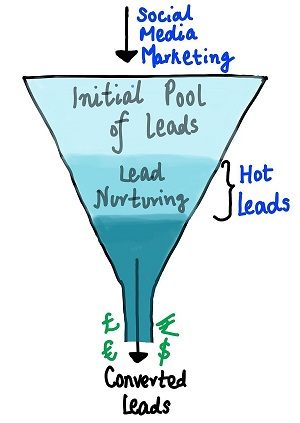
<h4 align="center">Lead Conversion Process - Demonstrated as a funnel</h4>

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

# 1. Libraries And Data Import

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import StandardScaler

# To perform Logistic regression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# To get all columns in tabular form
pd.set_option('display.max_columns',37)

In [2]:
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Reading the data dictionary file
df_structure = pd.read_excel('Leads Data Dictionary.xlsx',skiprows=2,usecols=[1,2])
# need this for just one cell
with pd.option_context('display.max_colwidth', None):
    display(df_structure)

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


### 1.A.  Dataframe Inspection

In [4]:
# The .info() code gives almost the entire information that needs to be inspected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# The .shape code gives the no. of rows and columns
df.shape

(9240, 37)

In [6]:
#To get an idea of the numeric values, use .describe()
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#To get an idea of the features and their data types if need to be changed any, use .dtypes()
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [8]:
# Duplicates check
df.loc[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


### 1.B. Missing Value Treatment

In [9]:
# Many columns contain value SELECT, which is nothing but the unselected from the drop-down menu where initially this option appears. 
# Eventually, this value can be treated as null value
df.replace('Select',np.NaN,inplace=True)

In [10]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Deleting the columns 'Prospect ID', 'Lead Number' as there is no effect of these colums on model prediction
df = df.drop('Prospect ID', axis=1)
df = df.drop('Lead Number', axis=1)

In [12]:
#Dropping the columns with more than 30% missing values

missing = round(100*(df.isnull().sum()/len(df.index)),2)
missing_col = missing[missing > 30].index
df = df.drop(missing_col,axis=1)

In [13]:
#Finding the count of values from each type of Lead Source and which source gives most leads
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
testone                 1
welearnblog_Home        1
NC_EDM                  1
youtubechannel          1
Pay per Click Ads       1
blog                    1
WeLearn                 1
Name: Lead Source, dtype: int64

In [14]:
#Filling the missing values in the Lead Source column with the mode.
# Google and google are same so we replaced with Google
df['Lead Source'].replace('google','Google',inplace=True)
df['Lead Source'] = df['Lead Source'].fillna(df['Lead Source'].mode()[0])
df['Lead Source'].isnull().sum()

0

In [15]:
#Checking the median of the Total Visits - The total number of visits made by the customer on the website.
df['TotalVisits'].median()

3.0

In [16]:
#Filling in the missing values in the Total Visits column with the median value of the Total Visits column
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())
df['TotalVisits'].isnull().sum()

0

In [17]:
#Finding the mean of Page Views Per Visit column 
df['Page Views Per Visit'].mean()

2.3628199494672093

In [18]:
#Filling in the missing values in the Page Views Per Visit column with the mean value of the Page Views Per Visit column
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mean())
df['Page Views Per Visit'].isnull().sum()

0

In [19]:
#Finding the mode(most common) value of Last activity performed by the customer
df['Last Activity'].mode()

0    Email Opened
dtype: object

In [20]:
#Filling in the missing values in the Lead Activity column with the mode value of Lead Activity column
df['Last Activity'] = df['Last Activity'].fillna('Email Opened')
df['Last Activity'].isnull().sum()

0

In [21]:
# So we have India large no of records in country column and NaN values remaining are less in quantity so we replaced with Outside India

df['Country'] = df['Country'].fillna('not provided')
def slots(x):
    category = ""
    if x == "India":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df['Country'] = df.apply(lambda x:slots(x['Country']), axis = 1)
df['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [22]:
#Observing the count of data items in the What is your current occupation column 
df['What is your current occupation'].value_counts() 

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
#Filling in the missing values in the What is your current occupation column with the value 'Not Provided' - This value is equivalent to a Null selection
df['What is your current occupation'] = df['What is your current occupation'].fillna('Not Provided')
df['What is your current occupation'].isnull().sum()

0

In [24]:
##Observing the count of data items in the What matters most to you in choosing a course column 
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- What matters most to you in choosing a course is highly skewed column toward Better Career Prospects and contains 29.31% missing values. Also imputing the missing values with the mode value Better Career Prospects will make it highly skewed. So we can drop that column instead.

In [25]:
#Dropping the What matters most to you in choosing a course column
df = df.drop(['What matters most to you in choosing a course'],1)

__Now Our Data has been sorted and filled , No Null values and ready for analysis .__

### 1.C. Outlier Treatment

In [26]:
#Understanding the numerical columns and looking at the various percentiles of the data in each 
df.describe(percentiles = [.25,.5,.75,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.362820
std,0.486714,4.819024,548.021466,2.145333
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000
max,1.000000,251.000000,2272.000000,55.000000


In [27]:
#Leaving the target column - Converted - saving all the other columns in a variable called feature for our further analysis
feature = df.columns[5:8]
for i in enumerate(feature):
    print(i)

(0, 'TotalVisits')
(1, 'Total Time Spent on Website')
(2, 'Page Views Per Visit')


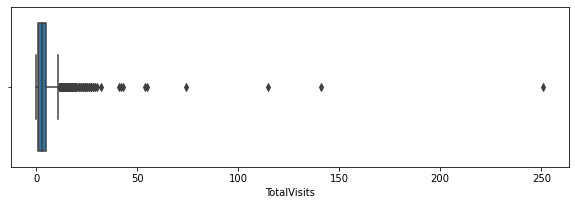

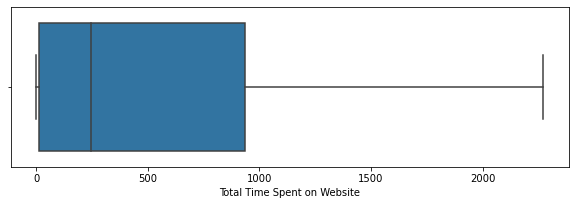

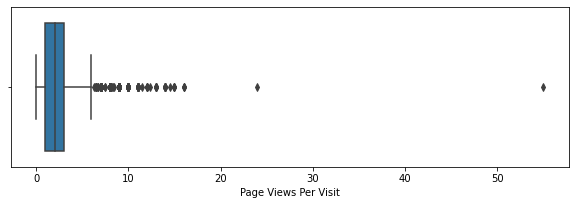

In [28]:
#Looking at the boxplots of the numerical columns 
for i in enumerate(feature):
    plt.figure(figsize = (10,10))
    plt.subplot(3,1, i[0]+1)
    sns.boxplot(df[i[1]])

In [29]:
#Removing the rows where the Total Visits are more than 17
df = df[(df.TotalVisits <= 17) ]

#Removing the rows where Total Time Spent on Website are more than 1840
df = df[(df['Total Time Spent on Website'] <= 1840)]

#Removing the rows where the Page Views Per Visit are more than 9
df = df[(df['Page Views Per Visit'] <= 9)]

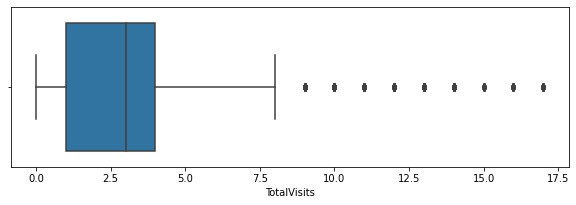

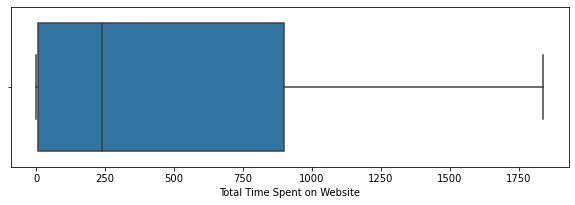

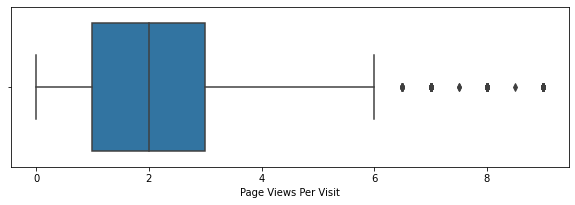

In [30]:
#Making boxplots for the numerical feature columns
for i in enumerate(feature):
    plt.figure(figsize = (10,10))
    plt.subplot(3,1, i[0]+1)
    sns.boxplot(df[i[1]])

In [31]:
# Determine the percentage of data retained

num_data = round(100*(len(df)/9240),2)
print(num_data)

97.39


#### Note - After cleaning data 98% data has been retained.

In [32]:
#Finding the final dimensions of the dataframe
df.shape

(8999, 24)

In [33]:
#Looking at the data types of the columns of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8999 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               8999 non-null   object 
 1   Lead Source                               8999 non-null   object 
 2   Do Not Email                              8999 non-null   object 
 3   Do Not Call                               8999 non-null   object 
 4   Converted                                 8999 non-null   int64  
 5   TotalVisits                               8999 non-null   float64
 6   Total Time Spent on Website               8999 non-null   int64  
 7   Page Views Per Visit                      8999 non-null   float64
 8   Last Activity                             8999 non-null   object 
 9   Country                                   8999 non-null   object 
 10  What is your current occupation     

In [34]:
#Creating a new dataframe lead1 in which the data is grouped by the target varibale - Converted 
df1 = df.groupby('Converted').count()
df1.reset_index()

,Converted,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,0,5565,5565,5565,5565,5565,5565,5565,5565,5565,5565,5565,5565,5565,5565,5565,5565,5565,5565,5565,5565,5565,5565,5565
1,1,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434,3434


In [35]:
cont = df.select_dtypes("number").columns
disc = df.select_dtypes("object").columns

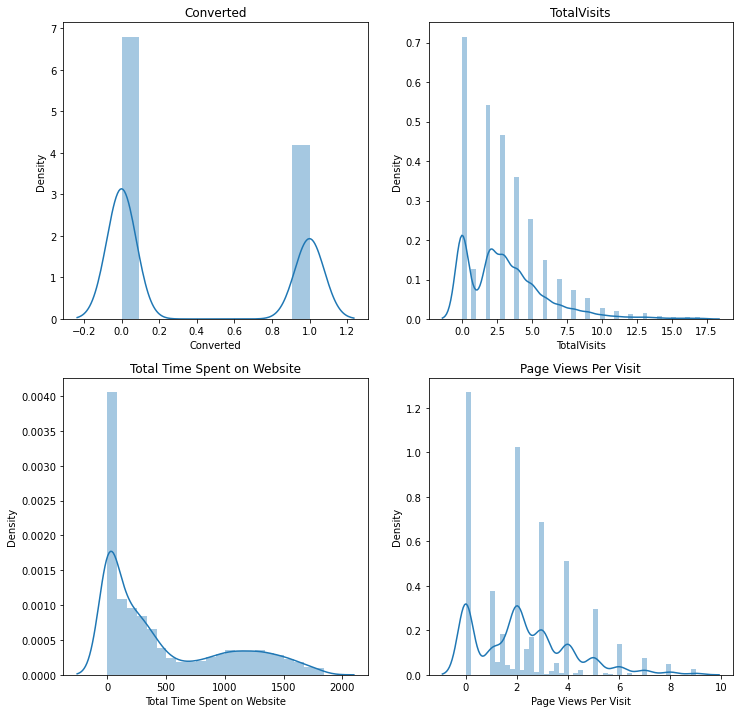

In [36]:
#Plotting distribution plot of all numerical columns
plt.figure(figsize=(12,12))
for i,col in enumerate(cont):
    plt.subplot(2,2,i+1)
    sns.distplot(df[col]).set(title=col)

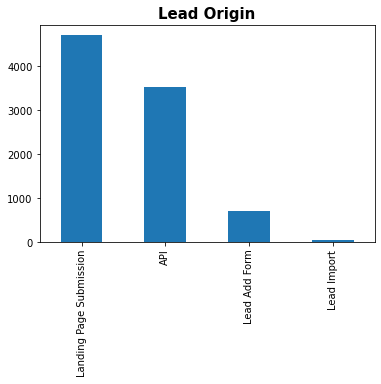

Lead Origin


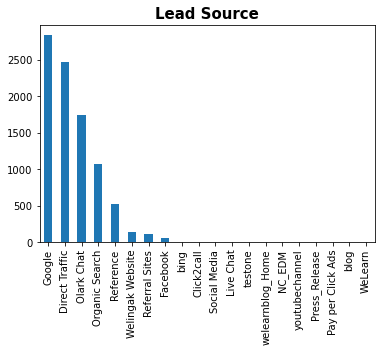

Lead Source


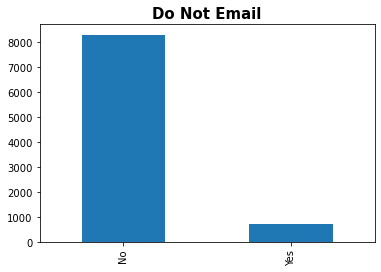

Do Not Email


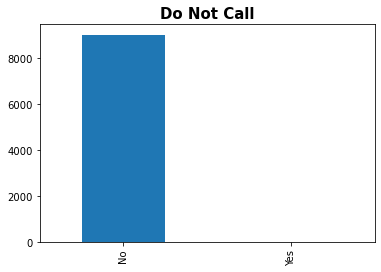

Do Not Call


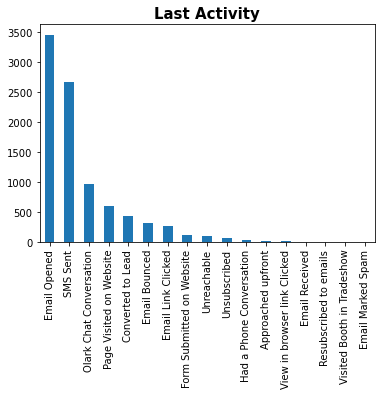

Last Activity


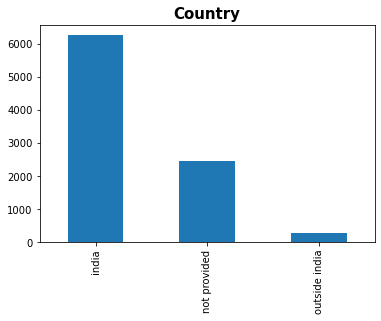

Country


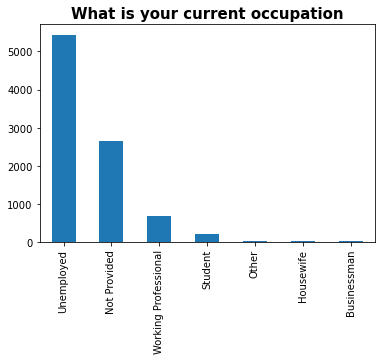

What is your current occupation


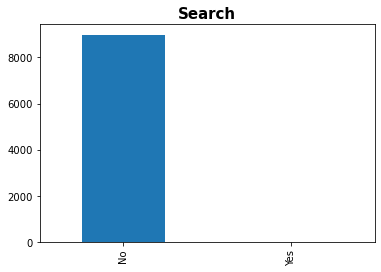

Search


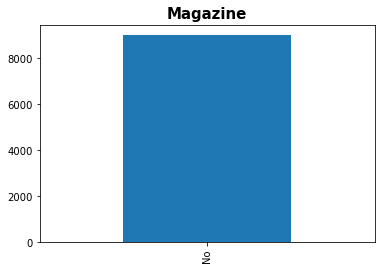

Magazine


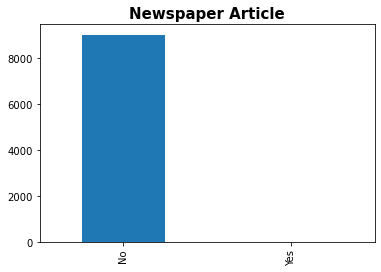

Newspaper Article


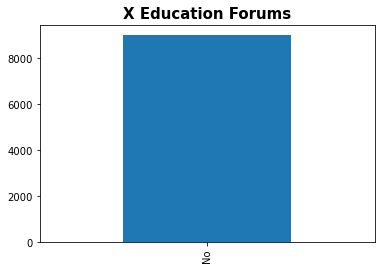

X Education Forums


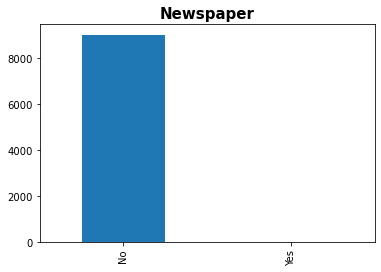

Newspaper


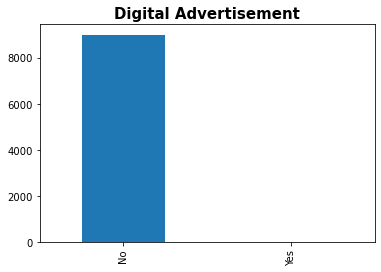

Digital Advertisement


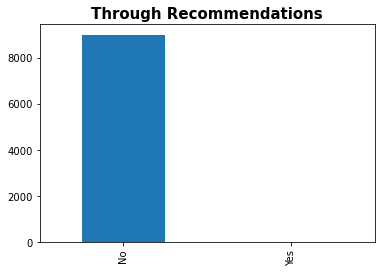

Through Recommendations


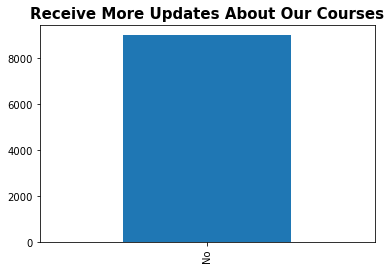

Receive More Updates About Our Courses


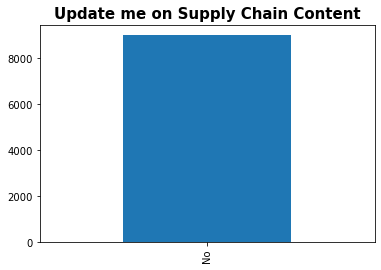

Update me on Supply Chain Content


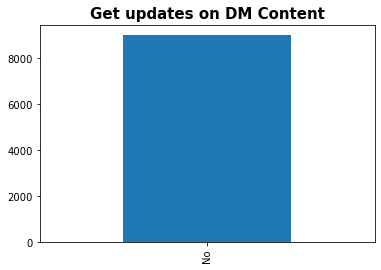

Get updates on DM Content


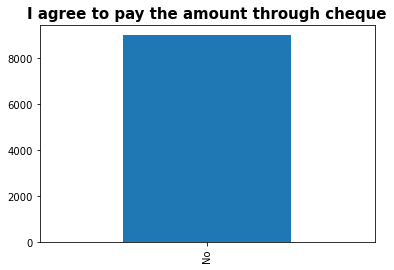

I agree to pay the amount through cheque


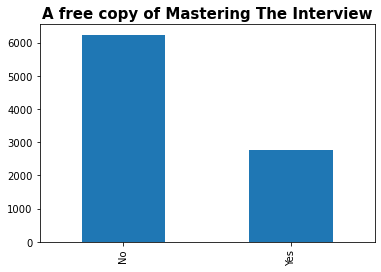

A free copy of Mastering The Interview


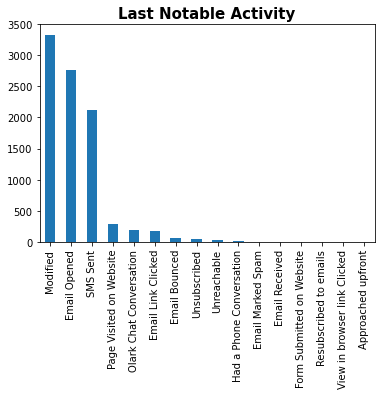

Last Notable Activity


In [37]:
for col in disc:
    df[col].value_counts().plot(kind='bar')
    plt.title(col,fontsize = 15,fontweight='bold')
    plt.show()
    print(col)

## Highely Skewed Data so we are droping

In [38]:
# Since the following columns have only one value "No" in all the rows, we can eliminate the columns :

df = df.drop(['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Through Recommendations',
              'Digital Advertisement','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [39]:
cont = df.select_dtypes("number").columns
disc = df.select_dtypes("object").columns

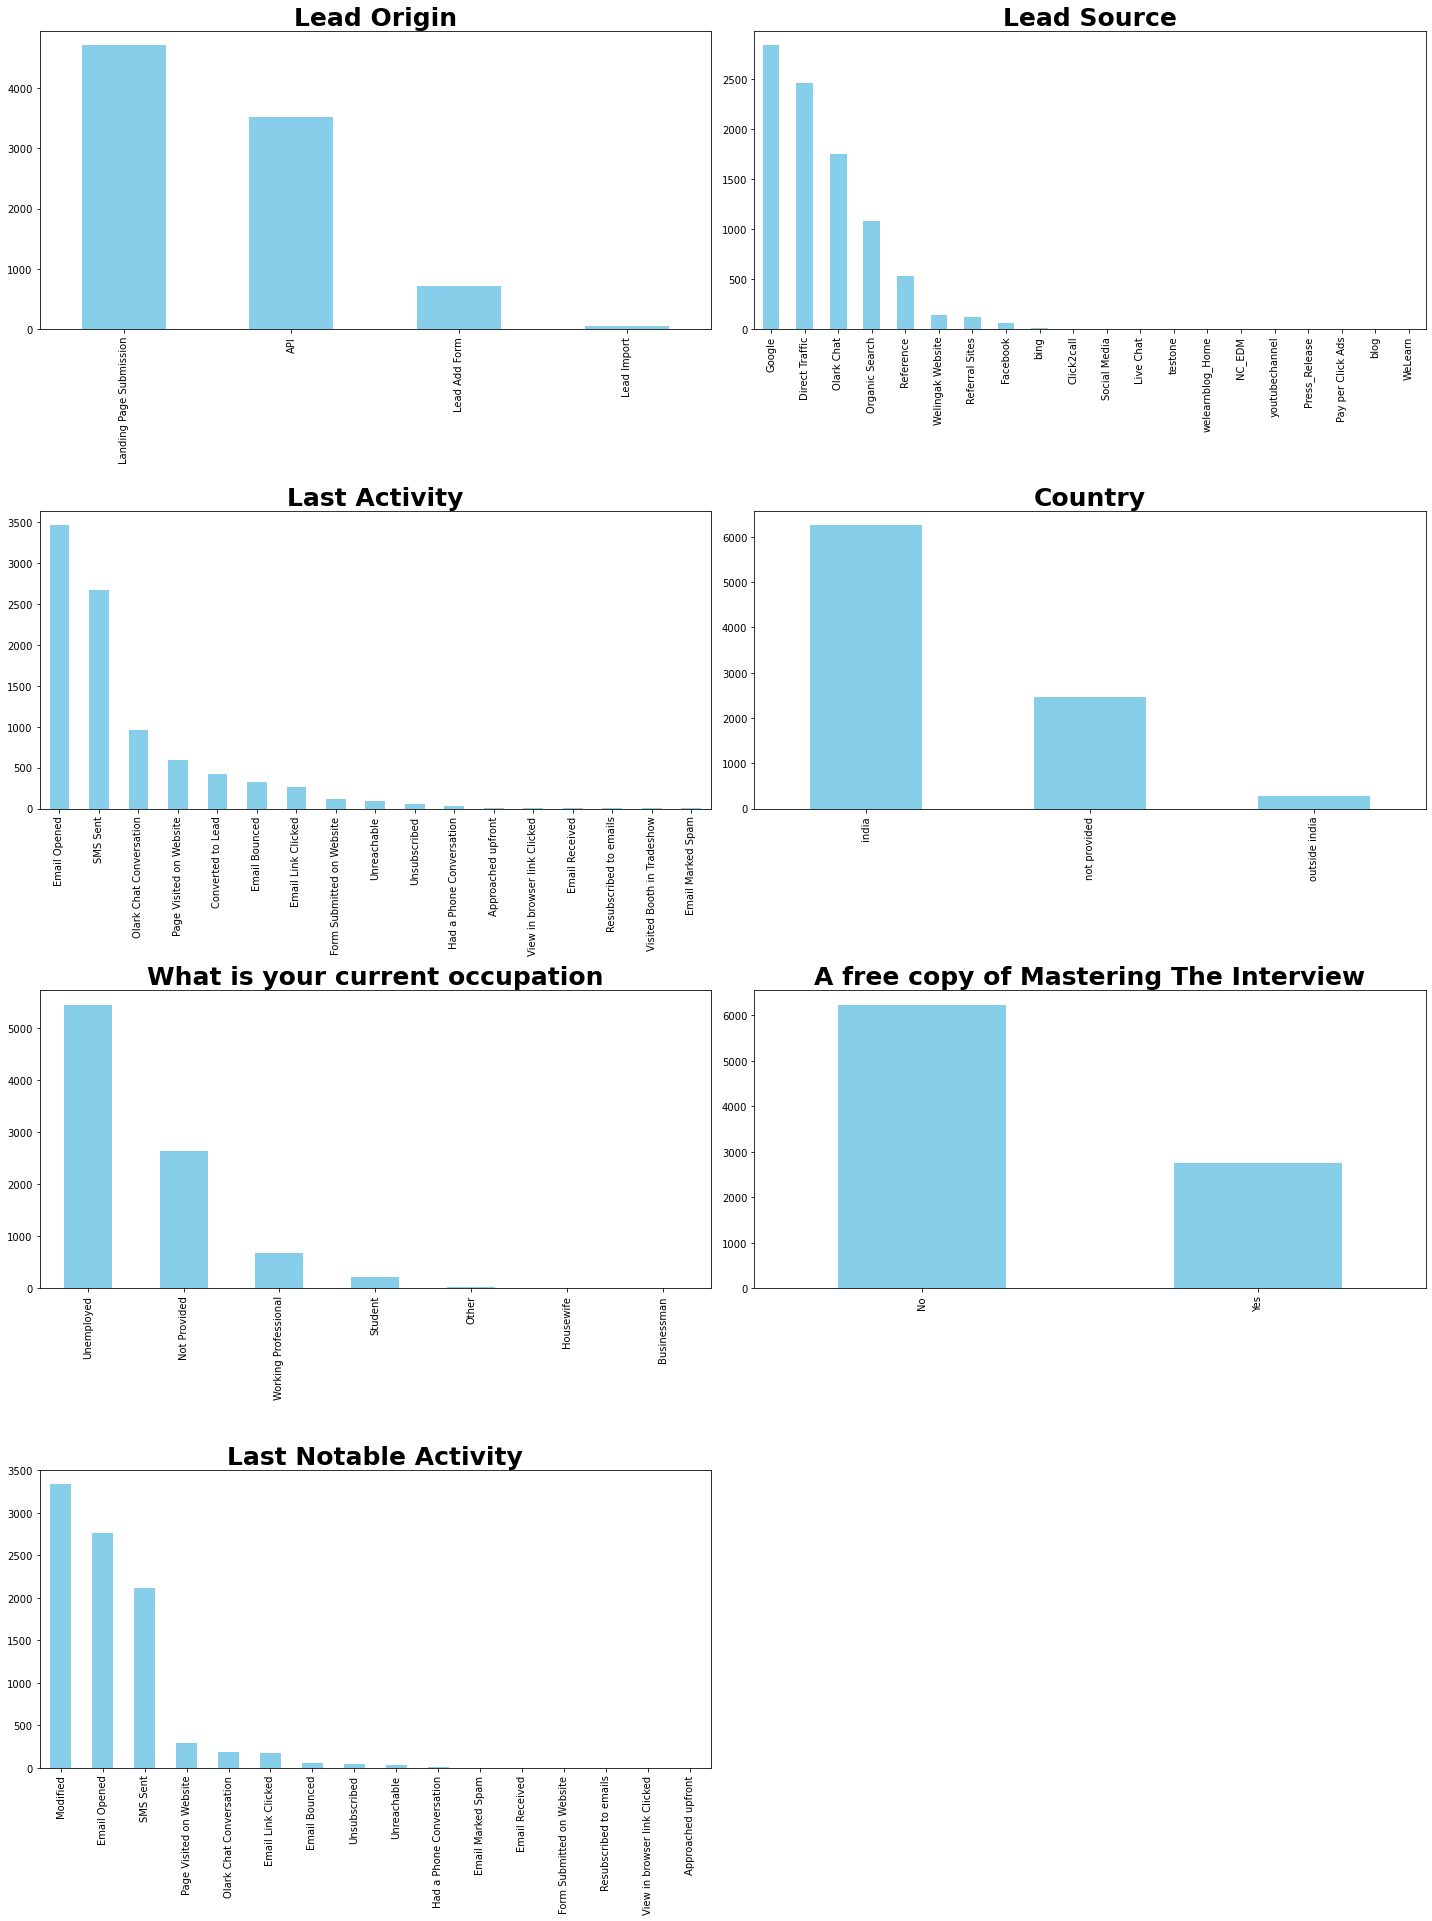

In [40]:
fig=plt.figure(figsize=[20,25])
fig.subplots_adjust(hspace=0.8,wspace=1.5)
for i in range(0,len(disc)):
    ax=fig.add_subplot(4,2,i+1)
    plt.title(disc[i],fontsize = 25,fontweight='bold')
    plt.tight_layout()
    df[disc[i]].value_counts().plot(kind='bar',color='SkyBlue')    

In [41]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,not provided,Unemployed,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,india,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,india,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,india,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,india,Unemployed,No,Modified


In [42]:
df['Lead Source'].value_counts()[df['Lead Source'].value_counts()>=100].index.tolist()

['Google',
 'Direct Traffic',
 'Olark Chat',
 'Organic Search',
 'Reference',
 'Welingak Website',
 'Referral Sites']

In [43]:
# Defining a function for to get back the values occuring more than 100 time's in a variable since 
# we don't want to make too many columns. 

def occur(df,col):
    s=df[col].value_counts()[df[col].value_counts()>=100].index.tolist()
    return df[df[col].isin(s) == True] 

In [44]:
df.shape

(8999, 11)

In [45]:
df=occur(df,'Lead Source')
df=occur(df,'Last Activity')
df=occur(df,'What is your current occupation')
df=occur(df,'Last Notable Activity')

In [46]:
df.shape

(8637, 11)

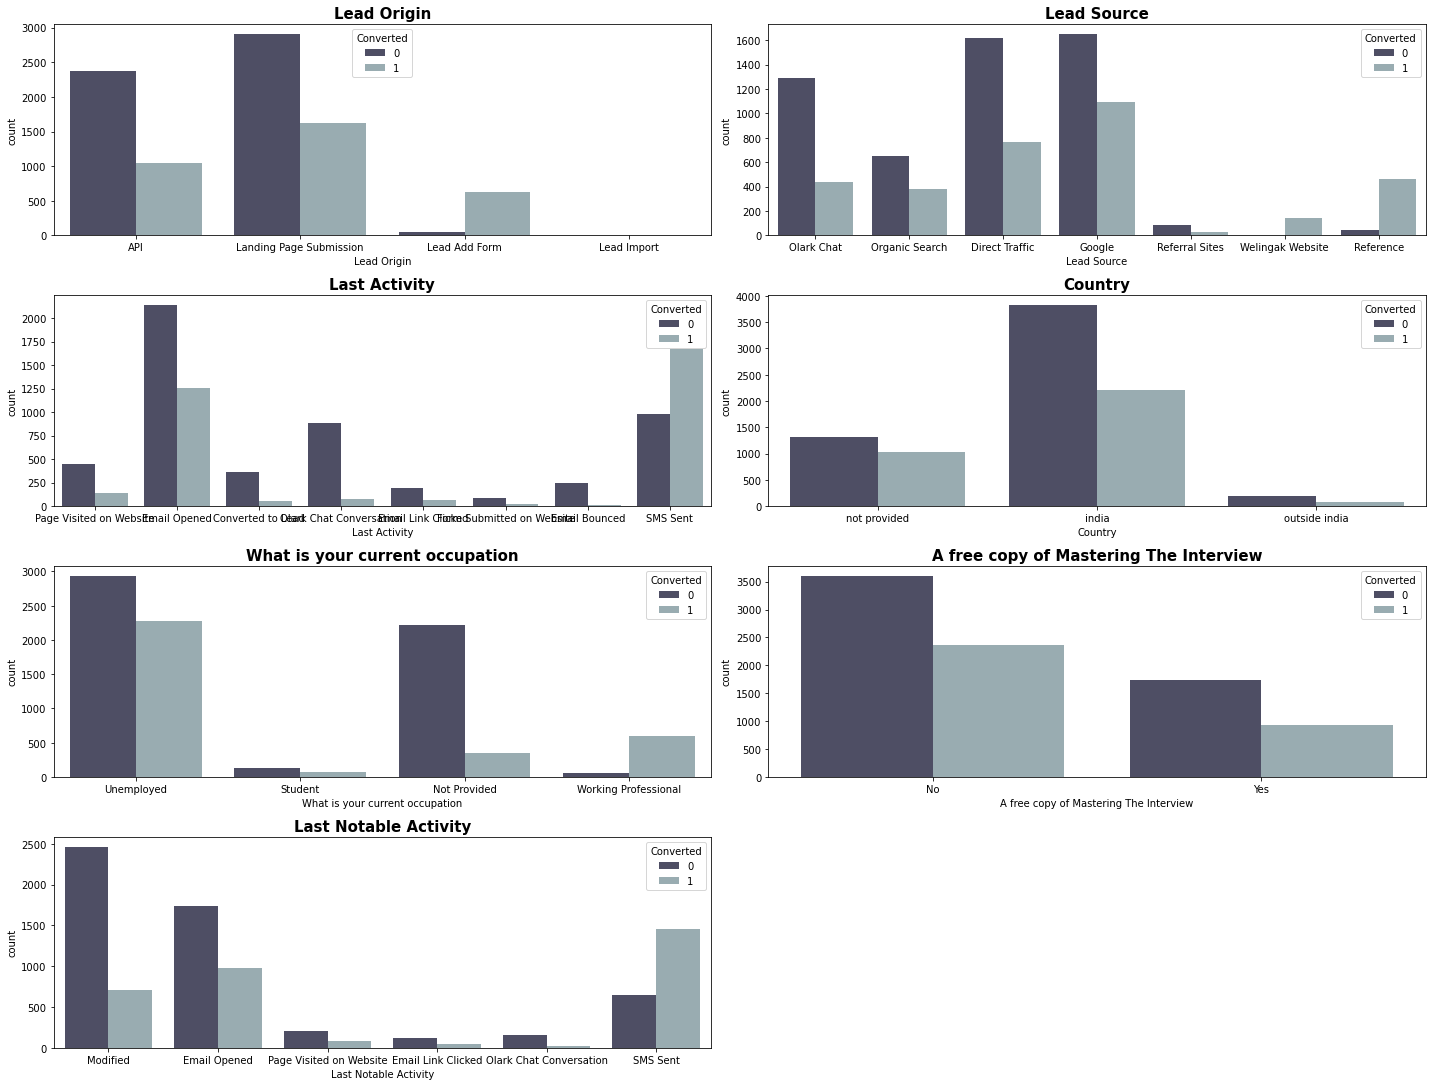

In [47]:
fig=plt.figure(figsize=[20,15])
fig.subplots_adjust(hspace=0.8,wspace=1.5)
for i in range(0,len(disc)):
    ax=fig.add_subplot(4,2,i+1)
    plt.title(disc[i],fontsize = 15,fontweight='bold')
    plt.tight_layout()
   # plt.xticks(rotation=60)
    sns.countplot(x=disc[i], hue="Converted", data=df,palette='bone')

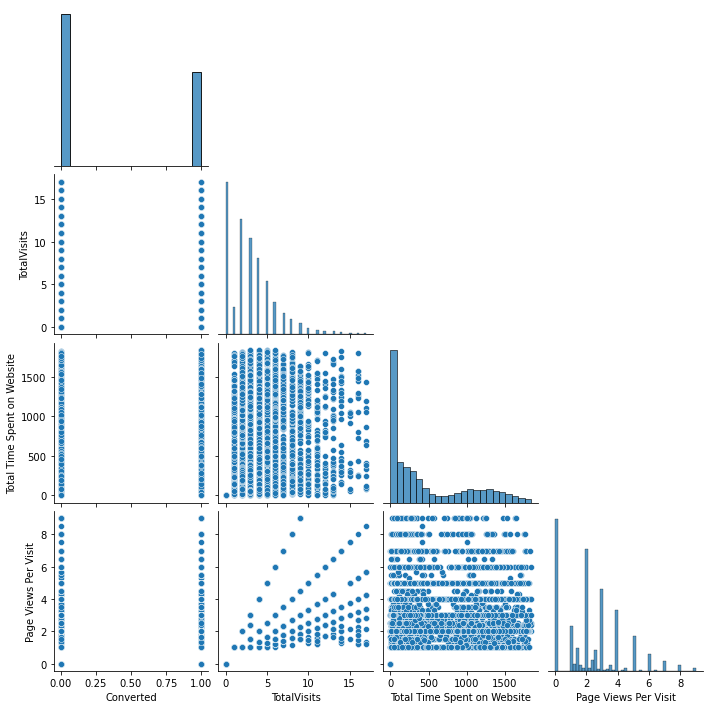

In [48]:
sns.pairplot(df,corner=True);

<AxesSubplot:>

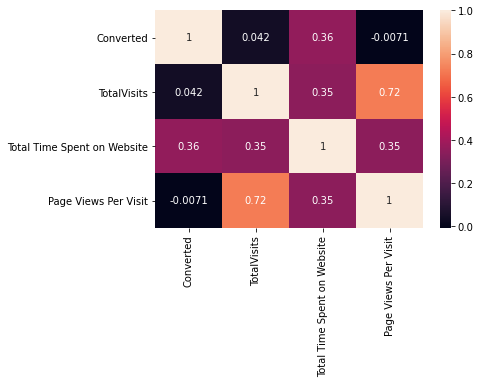

In [49]:
# lets check the correlation between different features
sns.heatmap(df.corr(),annot=True)

In [50]:
# Determine the percentage of data retained

num_data = round(100*(len(df)/9240),2)
print(num_data)

93.47


## Data Preparation

In [51]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dum = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity','Last Notable Activity', 'What is your current occupation','Country','A free copy of Mastering The Interview']], drop_first=True)

# Adding the results to the master dataframe
df1 = pd.concat([df, dum], axis=1)

In [52]:
df1.drop(['Lead Origin', 'Lead Source','Last Activity', 'Last Notable Activity','What is your current occupation','Country',
         'A free copy of Mastering The Interview'],axis=1,inplace=True)

### Test-Train Split

In [53]:
# Putting feature variable to X
X = df1.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Country_not provided,Country_outside india,A free copy of Mastering The Interview_Yes
0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
5,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [54]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
4    1
5    0
Name: Converted, dtype: int64

In [55]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

###  Feature Scaling

In [56]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Country_not provided,Country_outside india,A free copy of Mastering The Interview_Yes
6585,-0.394277,-0.734562,-0.137722,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
7437,-1.096933,-0.893183,-1.192708,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
8683,0.659706,-0.470194,1.444758,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7163,-0.042950,-0.507961,0.389772,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
2596,-0.042950,-0.400325,0.389772,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [57]:
### Checking the Conversion Rate
(sum(df['Converted'])/len(df['Converted'].index))*100

38.24244529350469

###  Looking at Correlations

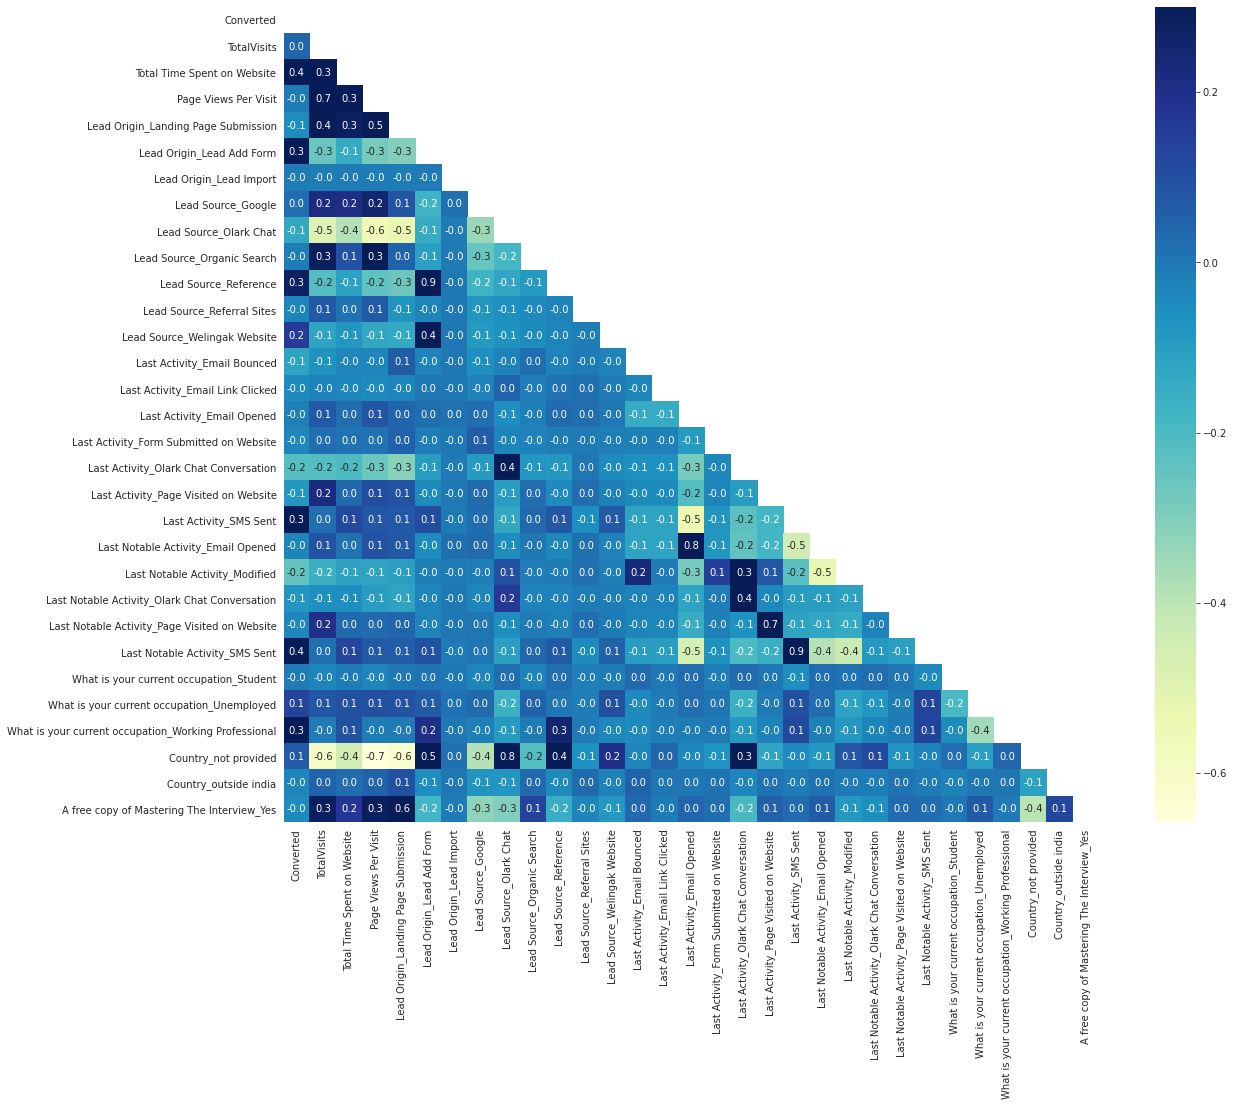

In [58]:
# lets check the correlation between different features

mask = np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,15))
    ax = sns.heatmap(df1.corr(), mask=mask, vmax=.3, square=True,annot=True,cmap='YlGnBu',fmt=".1f")

In [59]:
X_train['Lead Origin_Lead Import'].value_counts()

0    6044
1       1
Name: Lead Origin_Lead Import, dtype: int64

In [60]:
#Since all the values in the Lead Origin_Lead Import are '0' we can drop that column both in test and train
X_train.drop('Lead Origin_Lead Import',axis=1,inplace=True)
X_test.drop('Lead Origin_Lead Import',axis=1,inplace=True)

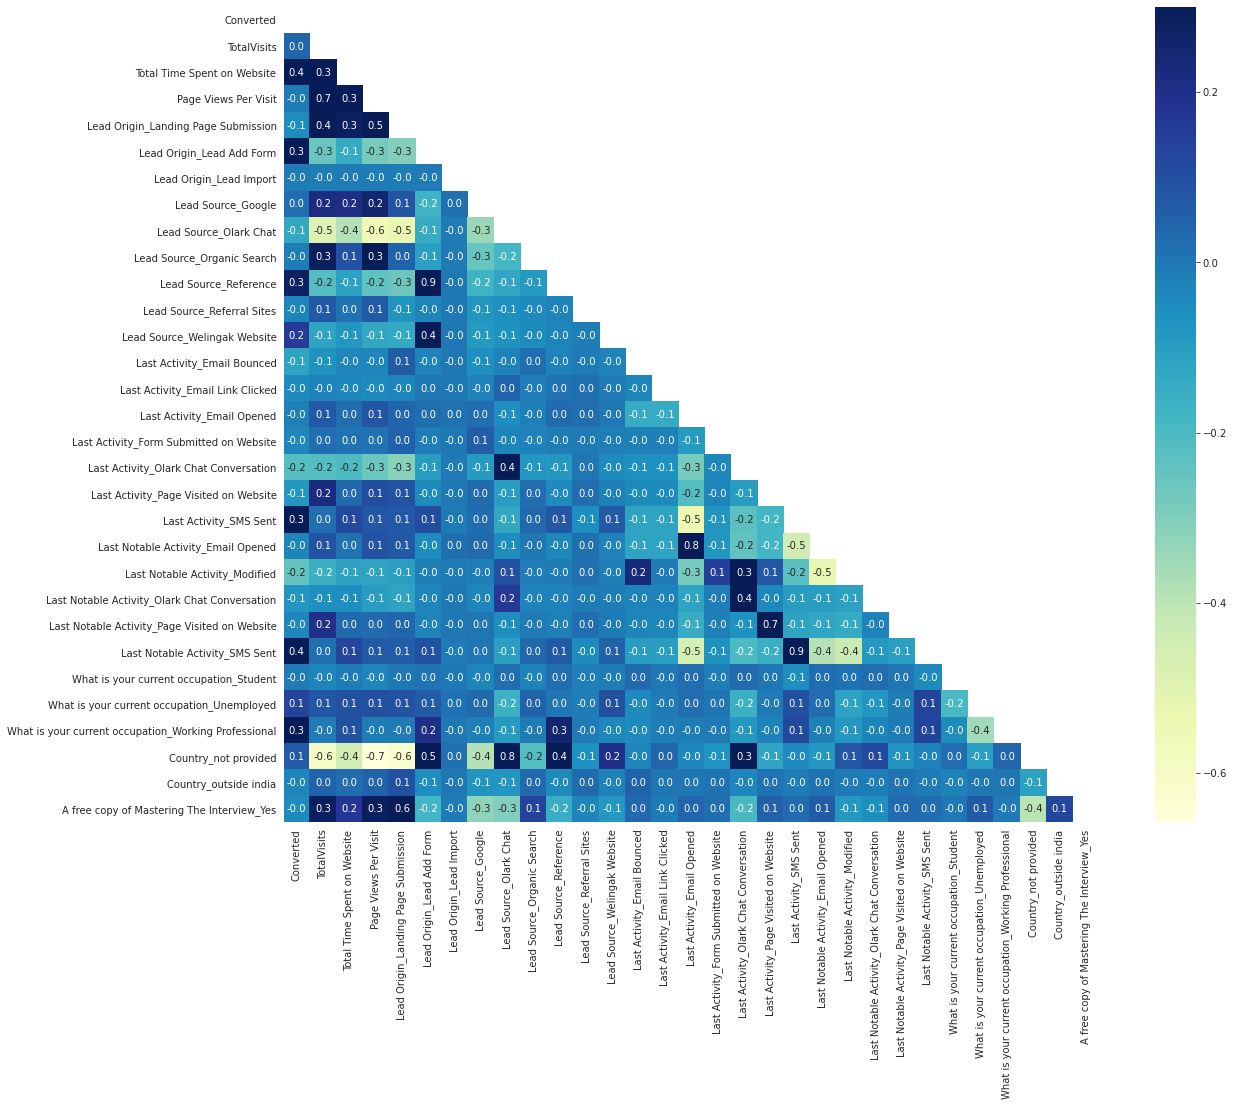

In [61]:
# lets check the correlation between different features
mask = np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,15))
    ax = sns.heatmap(df1.corr(), mask=mask, vmax=.3, square=True,annot=True,cmap='YlGnBu',fmt=".1f")

#  Model Building
##  Model 1

In [62]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6045
Model:                            GLM   Df Residuals:                     6015
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2444.8
Date:                Mon, 08 Mar 2021   Deviance:                       4889.7
Time:                        20:03:20   Pearson chi2:                 6.03e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0982      0.522     -5.935      0.000      -4.121      -2.075
TotalVisits                                              0.2968      0.053      5.588      0.000       0.193       0.401
Total Time Spent on Website                              1.0914      0.042     25.900      0.000       1.009       1.174
Page Views Per Visit                                    -0.2316      0.059     -3.941      0.000      -0.347      -0.116
Lead Origin_Landing Page Submission                     -0.1872      0.114     -1.648      0.099      -0.410       0.036
Lead Origin_Lead Add Form                                2.8385      0.802      3.540      0.000       1.267       4.410
Lead Source_Google                                       0.3676      0.119      3.094      0.002       0.135       0.601
Lead Source_Olark Chat                                   1.1222      0.289      3.881      0.000       0.556       1.689
Lead Source_Organic Search                               0.2272      0.135      1.680      0.093      -0.038       0.492
Lead Source_Reference                                    0.1577      0.788      0.200      0.841      -1.386       1.702
Lead Source_Referral Sites                               0.2355      0.381      0.618      0.536      -0.511       0.982
Lead Source_Welingak Website                            22.7981   1.23e+04      0.002      0.999   -2.42e+04    2.42e+04
Last Activity_Email Bounced                             -0.9758      0.434     -2.249      0.025      -1.826      -0.125
Last Activity_Email Link Clicked                         0.5800      0.429      1.350      0.177      -0.262       1.422
Last Activity_Email Opened                               0.9006      0.240      3.757      0.000       0.431       1.370
Last Activity_Form Submitted on Website                  0.0534      0.401      0.133      0.894      -0.732       0.839
Last Activity_Olark Chat Conversation                   -0.6036      0.279     -2.166      0.030      -1.150      -0.057
Last Activity_Page Visited on Website                    0.0705      0.304      0.232      0.816      -0.525       0.666
Last Activity_SMS Sent                                   1.2869      0.245      5.243      0.000       0.806       1.768
Last Notable Activity_Email Opened                      -0.0187      0.479     -0.039      0.969      -0.958       0.920
Last Notable Activity_Modified                          -0.1485      0.459     -0.323      0.747      -1.049       0.752
Last Notable Activity_Olark Chat Conversation            0.1921      0.581      0.331      0.741      -0.946       1.331
Last Notable Activity_Page Visited on Website            0

### Feature Selection Using RFE

In [63]:
logreg = LogisticRegression()

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [64]:
rfe.support_

array([False,  True, False,  True,  True, False,  True, False, False,
       False,  True,  True,  True,  True, False,  True, False,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False])

In [65]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 9),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 12),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Notable Activity_Email Opened', False, 8),
 ('Last Notable Activity_Modified', False, 5),
 ('Last Notable Activity_Olark Chat Conversation', False, 11),
 ('Last Notable Activity_Page Visited on Website', False, 15),

In [66]:
# Adding all supported columns in to col .
col = X_train.columns[rfe.support_]

In [67]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Country_outside india', 'A free copy of Mastering The Interview_Yes'],
      dtype='object')

## Model 2

In [68]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6045
Model:                            GLM   Df Residuals:                     6029
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2475.0
Date:                Mon, 08 Mar 2021   Deviance:                       4950.1
Time:                        20:03:22   Pearson chi2:                 6.13e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7152      0.150    -18.066      0.000      -3.010      -2.421
Total Time Spent on Website                              1.1031      0.042     26.411      0.000       1.021       1.185
Lead Origin_Landing Page Submission                     -0.3391      0.094     -3.622      0.000      -0.523      -0.156
Lead Origin_Lead Add Form                                2.7590      0.324      8.529      0.000       2.125       3.393
Lead Source_Olark Chat                                   0.8796      0.267      3.292      0.001       0.356       1.403
Lead Source_Welingak Website                            22.6457   1.23e+04      0.002      0.999   -2.41e+04    2.41e+04
Last Activity_Email Bounced                             -1.2528      0.396     -3.167      0.002      -2.028      -0.478
Last Activity_Email Link Clicked                         0.4889      0.242      2.020      0.043       0.015       0.963
Last Activity_Email Opened                               0.8182      0.125      6.559      0.000       0.574       1.063
Last Activity_Olark Chat Conversation                   -0.6813      0.197     -3.453      0.001      -1.068      -0.295
Last Activity_SMS Sent                                   1.0810      0.175      6.168      0.000       0.737       1.424
Last Notable Activity_SMS Sent                           1.0767      0.151      7.140      0.000       0.781       1.372
What is your current occupation_Student                  1.1621      0.235      4.939      0.000       0.701       1.623
What is your current occupation_Unemployed               1.0512      0.090     11.691      0.000       0.875       1.227
What is your current occupation_Working Professional     3.5009      0.206     17.006      0.000       3.097       3.904
Country_not provided                                     0.3029      0.263      1.153      0.249      -0.212       0.818
========================================================================================================================
"""

In [69]:
# checking VIF's
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Country_not provided,14.80
3,Lead Source_Olark Chat,11.05
9,Last Activity_SMS Sent,5.76
2,Lead Origin_Lead Add Form,5.54
10,Last Notable Activity_SMS Sent,4.80
12,What is your current occupation_Unemployed,2.89
1,Lead Origin_Landing Page Submission,2.88
7,Last Activity_Email Opened,2.62
8,Last Activity_Olark Chat Conversation,1.64
13,What is your current occupation_Working Profes...,1.39


In [70]:
# Since P value is high for Lead Source_Welingak Website we are droping it from list.
col = col.drop('Lead Source_Welingak Website',1)

## Model 3

In [71]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6045
Model:                            GLM   Df Residuals:                     6030
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2487.3
Date:                Mon, 08 Mar 2021   Deviance:                       4974.6
Time:                        20:03:22   Pearson chi2:                 6.45e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7126      0.150    -18.073      0.000      -3.007      -2.418
Total Time Spent on Website                              1.1021      0.042     26.376      0.000       1.020       1.184
Lead Origin_Landing Page Submission                     -0.3382      0.094     -3.614      0.000      -0.522      -0.155
Lead Origin_Lead Add Form                                3.1327      0.320      9.787      0.000       2.505       3.760
Lead Source_Olark Chat                                   0.8783      0.267      3.293      0.001       0.355       1.401
Last Activity_Email Bounced                             -1.3058      0.405     -3.225      0.001      -2.099      -0.512
Last Activity_Email Link Clicked                         0.4660      0.243      1.917      0.055      -0.010       0.942
Last Activity_Email Opened                               0.8131      0.124      6.533      0.000       0.569       1.057
Last Activity_Olark Chat Conversation                   -0.6750      0.196     -3.436      0.001      -1.060      -0.290
Last Activity_SMS Sent                                   1.0875      0.174      6.235      0.000       0.746       1.429
Last Notable Activity_SMS Sent                           1.0673      0.150      7.117      0.000       0.773       1.361
What is your current occupation_Student                  1.1350      0.237      4.782      0.000       0.670       1.600
What is your current occupation_Unemployed               1.0538      0.090     11.721      0.000       0.878       1.230
What is your current occupation_Working Professional     3.4828      0.206     16.880      0.000       3.078       3.887
Country_not provided                                     0.3034      0.262      1.157      0.247      -0.211       0.817
========================================================================================================================
"""

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Country_not provided,14.80
3,Lead Source_Olark Chat,11.05
8,Last Activity_SMS Sent,5.76
2,Lead Origin_Lead Add Form,5.24
9,Last Notable Activity_SMS Sent,4.80
11,What is your current occupation_Unemployed,2.89
1,Lead Origin_Landing Page Submission,2.88
6,Last Activity_Email Opened,2.62
7,Last Activity_Olark Chat Conversation,1.64
12,What is your current occupation_Working Profes...,1.37


In [73]:
# Since P value is high for Lead Source_Welingak Website we are droping it from list.
col = col.drop('Country_not provided',1)

## Model 4

In [74]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6045
Model:                            GLM   Df Residuals:                     6031
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2488.0
Date:                Mon, 08 Mar 2021   Deviance:                       4975.9
Time:                        20:03:23   Pearson chi2:                 6.45e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7104      0.150    -18.063      0.000      -3.005      -2.416
Total Time Spent on Website                              1.0965      0.041     26.436      0.000       1.015       1.178
Lead Origin_Landing Page Submission                     -0.3420      0.093     -3.660      0.000      -0.525      -0.159
Lead Origin_Lead Add Form                                3.4179      0.205     16.673      0.000       3.016       3.820
Lead Source_Olark Chat                                   1.1512      0.125      9.187      0.000       0.906       1.397
Last Activity_Email Bounced                             -1.2880      0.403     -3.200      0.001      -2.077      -0.499
Last Activity_Email Link Clicked                         0.4724      0.243      1.945      0.052      -0.004       0.948
Last Activity_Email Opened                               0.8182      0.124      6.578      0.000       0.574       1.062
Last Activity_Olark Chat Conversation                   -0.6663      0.196     -3.393      0.001      -1.051      -0.281
Last Activity_SMS Sent                                   1.0918      0.174      6.261      0.000       0.750       1.434
Last Notable Activity_SMS Sent                           1.0690      0.150      7.131      0.000       0.775       1.363
What is your current occupation_Student                  1.1395      0.237      4.800      0.000       0.674       1.605
What is your current occupation_Unemployed               1.0549      0.090     11.732      0.000       0.879       1.231
What is your current occupation_Working Professional     3.4899      0.206     16.913      0.000       3.085       3.894
========================================================================================================================
"""

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_SMS Sent,5.75
9,Last Notable Activity_SMS Sent,4.80
11,What is your current occupation_Unemployed,2.89
1,Lead Origin_Landing Page Submission,2.87
6,Last Activity_Email Opened,2.61
3,Lead Source_Olark Chat,2.23
7,Last Activity_Olark Chat Conversation,1.63
2,Lead Origin_Lead Add Form,1.53
12,What is your current occupation_Working Profes...,1.37
0,Total Time Spent on Website,1.28


In [76]:
col = col.drop('Last Activity_Email Link Clicked',1)

## Model 5

In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6045
Model:                            GLM   Df Residuals:                     6032
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2489.8
Date:                Mon, 08 Mar 2021   Deviance:                       4979.6
Time:                        20:03:23   Pearson chi2:                 6.45e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6182      0.141    -18.615      0.000      -2.894      -2.343
Total Time Spent on Website                              1.0945      0.041     26.435      0.000       1.013       1.176
Lead Origin_Landing Page Submission                     -0.3406      0.093     -3.650      0.000      -0.523      -0.158
Lead Origin_Lead Add Form                                3.4416      0.205     16.785      0.000       3.040       3.843
Lead Source_Olark Chat                                   1.1647      0.125      9.301      0.000       0.919       1.410
Last Activity_Email Bounced                             -1.3844      0.399     -3.466      0.001      -2.167      -0.602
Last Activity_Email Opened                               0.7223      0.112      6.421      0.000       0.502       0.943
Last Activity_Olark Chat Conversation                   -0.7672      0.189     -4.070      0.000      -1.137      -0.398
Last Activity_SMS Sent                                   0.9963      0.166      5.996      0.000       0.671       1.322
Last Notable Activity_SMS Sent                           1.0692      0.150      7.130      0.000       0.775       1.363
What is your current occupation_Student                  1.1320      0.237      4.777      0.000       0.667       1.596
What is your current occupation_Unemployed               1.0544      0.090     11.732      0.000       0.878       1.231
What is your current occupation_Working Professional     3.4889      0.206     16.919      0.000       3.085       3.893
========================================================================================================================
"""

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,5.65
8,Last Notable Activity_SMS Sent,4.80
10,What is your current occupation_Unemployed,2.83
1,Lead Origin_Landing Page Submission,2.78
5,Last Activity_Email Opened,2.45
3,Lead Source_Olark Chat,2.14
6,Last Activity_Olark Chat Conversation,1.58
2,Lead Origin_Lead Add Form,1.51
11,What is your current occupation_Working Profes...,1.36
0,Total Time Spent on Website,1.28


In [79]:
col = col.drop('Last Activity_SMS Sent',1)

## Model 6

In [80]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6045
Model:                            GLM   Df Residuals:                     6033
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2507.6
Date:                Mon, 08 Mar 2021   Deviance:                       5015.2
Time:                        20:03:24   Pearson chi2:                 6.59e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2751      0.124    -18.355      0.000      -2.518      -2.032
Total Time Spent on Website                              1.0938      0.041     26.536      0.000       1.013       1.175
Lead Origin_Landing Page Submission                     -0.3289      0.093     -3.547      0.000      -0.511      -0.147
Lead Origin_Lead Add Form                                3.5409      0.205     17.292      0.000       3.140       3.942
Lead Source_Olark Chat                                   1.1789      0.125      9.448      0.000       0.934       1.423
Last Activity_Email Bounced                             -1.7156      0.397     -4.326      0.000      -2.493      -0.938
Last Activity_Email Opened                               0.3985      0.095      4.215      0.000       0.213       0.584
Last Activity_Olark Chat Conversation                   -1.0940      0.178     -6.140      0.000      -1.443      -0.745
Last Notable Activity_SMS Sent                           1.7441      0.104     16.839      0.000       1.541       1.947
What is your current occupation_Student                  1.0577      0.235      4.495      0.000       0.597       1.519
What is your current occupation_Unemployed               1.0140      0.089     11.366      0.000       0.839       1.189
What is your current occupation_Working Professional     3.4523      0.205     16.834      0.000       3.050       3.854
========================================================================================================================
"""

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.78
1,Lead Origin_Landing Page Submission,2.52
5,Last Activity_Email Opened,2.22
3,Lead Source_Olark Chat,2.05
7,Last Notable Activity_SMS Sent,1.90
6,Last Activity_Olark Chat Conversation,1.54
2,Lead Origin_Lead Add Form,1.45
10,What is your current occupation_Working Profes...,1.36
0,Total Time Spent on Website,1.28
4,Last Activity_Email Bounced,1.09


In [82]:
# Checking the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:12]

6585    0.343128
7437    0.040423
8683    0.061815
7163    0.037700
2596    0.045569
953     0.971461
5380    0.014714
147     0.022255
2971    0.059384
5693    0.340597
6301    0.749881
1219    0.040423
dtype: float64

In [83]:
# Reshape of predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.34312772, 0.04042319, 0.06181521, 0.03770025, 0.0455692 ,
       0.97146149, 0.01471431, 0.02225486, 0.05938402, 0.3405968 ])

- Creating a dataframe with the actual converted flag and the predicted probabilities

In [84]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.343128,6585
1,0,0.040423,7437
2,0,0.061815,8683
3,0,0.037700,7163
4,0,0.045569,2596


In [85]:
# Adding a  new column 'predicted' with 1 if Converted_Prob > 0.5 else 0.
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.343128,6585,0
1,0,0.040423,7437,0
2,0,0.061815,8683,0
3,0,0.037700,7163,0
4,0,0.045569,2596,0


In [86]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3316  419]
 [ 717 1593]]


In [87]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8120760959470636


Accuracy rate is around - 81.2% which is good. However we will also need to calculate the other metrics as we cannot depend only on the accuracy metrics.

__Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value__

In [88]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [89]:
print("Statistics for model at cutoff value for Converted_prob > 0.5")
print("")
# Let's check the overall accuracy.
print('Overall_Accuracy :{0}'.format(round(metrics.accuracy_score(y_train_pred_final.Converted,
                                                                   y_train_pred_final.predicted),2)))

sensitivity = round(TP / float(TP+FN),2)
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :{0}'.format(sensitivity))

specificity = round(TN / float(TN+FP),2)

# Let us calculate specificity
print('Specificity : {0}'.format(specificity))

# Calculate false postive rate - predicting lead when customer does not convert
print('False positive rate : {0}'.format(round(FP/ float(TN+FP),2)))

precision = round(TP / float(TP+FP),2)
# positive predictive value (Precision)
print ('Precision(Positive predictive Value) : {0}'.format(precision))

# Negative predictive value
print ('Negative predictive Value : {0}'.format(round(TN / float(TN+ FN),2)))

print("")

print("Sensitivity - Specificity : {0} , {1}".format(sensitivity,specificity))

print("Precision - Recall : {0} , {1}".format(precision,sensitivity))

print("F1 score is : {0} ".format(2*(precision*sensitivity)/(precision+sensitivity)))

Statistics for model at cutoff value for Converted_prob > 0.5

Overall_Accuracy :0.81
Sensitivity :0.69
Specificity : 0.89
False positive rate : 0.11
Precision(Positive predictive Value) : 0.79
Negative predictive Value : 0.82

Sensitivity - Specificity : 0.69 , 0.89
Precision - Recall : 0.79 , 0.69
F1 score is : 0.7366216216216217 


##  ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [90]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [91]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

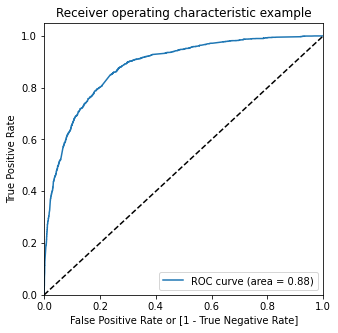

In [92]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Search of optimal cut off point

In [93]:
# Let's create columns with different probability cutoffs .
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.343128,6585,0,1,1,1,1,0,0,0,0,0,0
1,0,0.040423,7437,0,1,0,0,0,0,0,0,0,0,0
2,0,0.061815,8683,0,1,0,0,0,0,0,0,0,0,0
3,0,0.037700,7163,0,1,0,0,0,0,0,0,0,0,0
4,0,0.045569,2596,0,1,0,0,0,0,0,0,0,0,0


In [94]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.382134     1.000000     0.000000
0.1   0.1  0.592887     0.977922     0.354752
0.2   0.2  0.764764     0.908225     0.676037
0.3   0.3  0.788089     0.867100     0.739224
0.4   0.4  0.806286     0.768398     0.829719
0.5   0.5  0.812076     0.689610     0.887818
0.6   0.6  0.802647     0.617749     0.917001
0.7   0.7  0.778660     0.503896     0.948594
0.8   0.8  0.754177     0.405195     0.970013
0.9   0.9  0.710174     0.259740     0.988755


<Figure size 864x576 with 0 Axes>

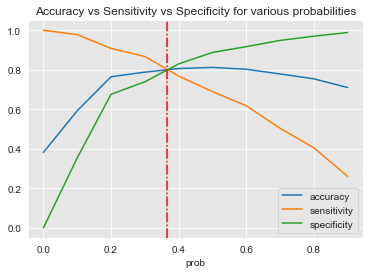

In [95]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(12,8))
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.axvline(0.365,linestyle='-.',color='r')
plt.title('Accuracy vs Sensitivity vs Specificity for various probabilities')
plt.show()

From the curve, 0.365 is the optimal point to take

In [96]:
# Let us make the final prediction using 0.365 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.365 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.343128,6585,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.040423,7437,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.061815,8683,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.037700,7163,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.045569,2596,0,1,0,0,0,0,0,0,0,0,0,0


In [97]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(15)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.343128,6585,0,1,1,1,1,0,0,0,0,0,0,0,34
1,0,0.040423,7437,0,1,0,0,0,0,0,0,0,0,0,0,4
2,0,0.061815,8683,0,1,0,0,0,0,0,0,0,0,0,0,6
3,0,0.037700,7163,0,1,0,0,0,0,0,0,0,0,0,0,4
4,0,0.045569,2596,0,1,0,0,0,0,0,0,0,0,0,0,5
5,1,0.971461,953,1,1,1,1,1,1,1,1,1,1,1,1,97
6,0,0.014714,5380,0,1,0,0,0,0,0,0,0,0,0,0,1
7,0,0.022255,147,0,1,0,0,0,0,0,0,0,0,0,0,2
8,0,0.059384,2971,0,1,0,0,0,0,0,0,0,0,0,0,6
9,0,0.340597,5693,0,1,1,1,1,0,0,0,0,0,0,0,34


In [98]:
# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1836
0     474
Name: final_predicted, dtype: int64

In [99]:
# check the precentage of final_predicted conversions

1836/float(1836+474)

0.7948051948051948

__Hence we can see that the final prediction of conversions have a target of 79% (79.48%) conversion as per the X Educations CEO's requirement . Hence this is a good model.__

In [100]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8036393713813068

In [101]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3022,  713],
       [ 474, 1836]], dtype=int64)

In [102]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [103]:
print("Statistics for model at cutoff value for Converted_prob > 0.365")
print("")
# Let's check the overall accuracy.
print('Overall_Accuracy :{0}'.format(round(metrics.accuracy_score(y_train_pred_final.Converted, 
                                                                   y_train_pred_final.final_predicted),2)))

sensitivity = round(TP / float(TP+FN),2)
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :{0}'.format(sensitivity))

specificity = round(TN / float(TN+FP),2)

# Let us calculate specificity
print('Specificity : {0}'.format(specificity))

# Calculate false postive rate - predicting lead when customer does not convert
print('False positive rate : {0}'.format(round(FP/ float(TN+FP),2)))

precision = round(TP / float(TP+FP),2)
# positive predictive value (Precision)
print ('Precision(Positive predictive Value) : {0}'.format(precision))

# Negative predictive value
print ('Negative predictive Value : {0}'.format(round(TN / float(TN+ FN),2)))

print("")

print("Sensitivity - Specificity : {0} , {1}".format(sensitivity,specificity))

print("Precision - Recall : {0} , {1}".format(precision,sensitivity))

print("F1 score is : {0} ".format(2*(precision*sensitivity)/(precision+sensitivity)))

Statistics for model at cutoff value for Converted_prob > 0.365

Overall_Accuracy :0.8
Sensitivity :0.79
Specificity : 0.81
False positive rate : 0.19
Precision(Positive predictive Value) : 0.72
Negative predictive Value : 0.86

Sensitivity - Specificity : 0.79 , 0.81
Precision - Recall : 0.72 , 0.79
F1 score is : 0.7533774834437086 


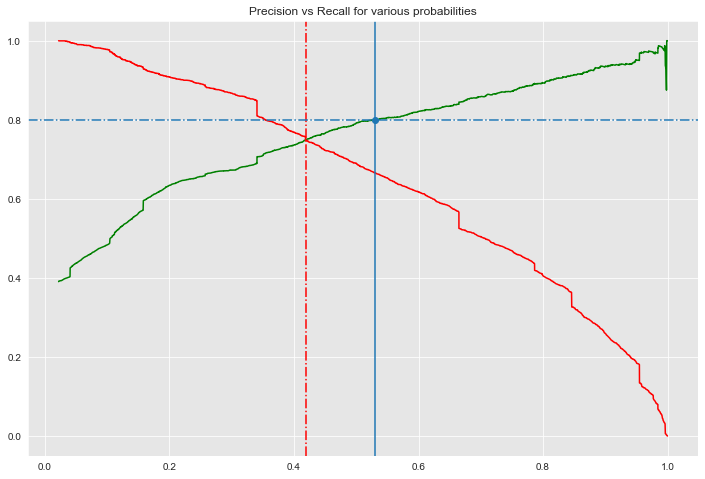

In [104]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.figure(figsize=(12,8))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision vs Recall for various probabilities')
plt.axvline(0.42,linestyle='-.',color='r')  #optimal cutoff as per the curve

plt.plot(np.interp (0.80, p[:-1], thresholds),0.8,'o')  # need to find threshold where precision is 0.8
plt.axhline(0.80,linestyle='-.')
plt.axvline(np.interp (0.80, p[:-1], thresholds))
plt.show()

In [105]:
round(np.interp (0.80, p[:-1], thresholds),3)

0.53

# Check on the test set

In [106]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [107]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4562,-0.893183,0,0,1,0,1,0,0,0,0,0
9102,-0.893183,0,0,1,0,0,0,0,1,0,0
2353,-0.517403,0,0,0,0,0,1,0,0,1,0
3429,-0.893183,0,0,1,0,1,0,0,0,0,0
8863,-0.033986,1,0,0,0,0,0,1,0,1,0


In [108]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [109]:
y_test_pred[:10]

4562    0.157814
9102    0.265931
2353    0.051123
3429    0.157814
8863    0.529190
6771    0.904871
2166    0.895459
5382    0.449665
1851    0.148145
6178    0.805072
dtype: float64

In [110]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [111]:
# Let's see the head

y_pred_1.head()

,0
4562,0.157814
9102,0.265931
2353,0.051123
3429,0.157814
8863,0.529190


In [112]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [113]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [114]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [115]:
# Appending y_test_df and y_pred_1

y_pred_final1 = pd.concat([y_test_df, y_pred_1],axis=1)

In [116]:
y_pred_final1.head()

,Converted,LeadId,0
0,0,4562,0.157814
1,0,9102,0.265931
2,0,2353,0.051123
3,0,3429,0.157814
4,0,8863,0.529190


In [117]:
# Renaming the column 

y_pred_final1= y_pred_final1.rename(columns={ 0 : 'Converted_Prob'})

In [118]:
y_pred_final1.head()

,Converted,LeadId,Converted_Prob
0,0,4562,0.157814
1,0,9102,0.265931
2,0,2353,0.051123
3,0,3429,0.157814
4,0,8863,0.529190


In [119]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.365%

y_pred_final1['final_predicted'] = y_pred_final1.Converted_Prob.map(lambda x: 1 if x > 0.365 else 0)

In [120]:
y_pred_final1.head()

,Converted,LeadId,Converted_Prob,final_predicted
0,0,4562,0.157814,0
1,0,9102,0.265931,0
2,0,2353,0.051123,0
3,0,3429,0.157814,0
4,0,8863,0.529190,1


In [121]:
#  Now let us calculate the lead score

y_pred_final1['lead_score'] = y_pred_final1.Converted_Prob.map(lambda x: round(x*100))
y_pred_final1.head(15)

,Converted,LeadId,Converted_Prob,final_predicted,lead_score
0,0,4562,0.157814,0,16
1,0,9102,0.265931,0,27
2,0,2353,0.051123,0,5
3,0,3429,0.157814,0,16
4,0,8863,0.529190,1,53
5,0,6771,0.904871,1,90
6,1,2166,0.895459,1,90
7,1,5382,0.449665,1,45
8,0,1851,0.148145,0,15
9,1,6178,0.805072,1,81


In [122]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final1.loc[y_pred_final1['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    837
0    156
Name: final_predicted, dtype: int64

In [123]:
# check the percentage of final_predicted conversions on test data

837/float(837+156)

0.8429003021148036

__Hence we can see that the final prediction of conversions have a target rate of 84% (84.3%) (Around 3 % more of the predictions made on training data set)__

### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set

In [124]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final1.Converted, y_pred_final1.final_predicted)

0.8290895061728395

In [125]:
confusion2 = metrics.confusion_matrix(y_pred_final1.Converted, y_pred_final1.final_predicted )
confusion2

array([[1312,  287],
       [ 156,  837]], dtype=int64)

In [126]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [127]:
print("Statistics for model at cutoff value for Converted_prob > 0.365")
print("")
# Let's check the overall accuracy.
print('Overall_Accuracy :{0}'.format(round(metrics.accuracy_score(y_train_pred_final.Converted,
                                                                   y_train_pred_final.final_predicted),2)))
sensitivity = round(TP / float(TP+FN),2)
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :{0}'.format(sensitivity))

specificity = round(TN / float(TN+FP),2)

# Let us calculate specificity
print('Specificity : {0}'.format(specificity))

# Calculate false postive rate - predicting lead when customer does not convert
print('False positive rate : {0}'.format(round(FP/ float(TN+FP),2)))

precision = round(TP / float(TP+FP),2)
# positive predictive value (Precision)
print ('Precision(Positive predictive Value) : {0}'.format(precision))

# Negative predictive value
print ('Negative predictive Value : {0}'.format(round(TN / float(TN+ FN),2)))

print("")

print("Sensitivity - Specificity : {0} , {1}".format(sensitivity,specificity))

print("Precision - Recall : {0} , {1}".format(precision,sensitivity))

print("F1 score is : {0} ".format(2*(precision*sensitivity)/(precision+sensitivity)))

Statistics for model at cutoff value for Converted_prob > 0.365

Overall_Accuracy :0.8
Sensitivity :0.84
Specificity : 0.82
False positive rate : 0.18
Precision(Positive predictive Value) : 0.74
Negative predictive Value : 0.89

Sensitivity - Specificity : 0.84 , 0.82
Precision - Recall : 0.74 , 0.84
F1 score is : 0.7868354430379746 


In [128]:
res.params[1:].sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.540855
What is your current occupation_Working Professional    3.452264
Last Notable Activity_SMS Sent                          1.744129
Lead Source_Olark Chat                                  1.178926
Total Time Spent on Website                             1.093783
What is your current occupation_Student                 1.057725
What is your current occupation_Unemployed              1.013950
Last Activity_Email Opened                              0.398507
Lead Origin_Landing Page Submission                    -0.328944
Last Activity_Olark Chat Conversation                  -1.093996
Last Activity_Email Bounced                            -1.715585
dtype: float64

### Conclusion :

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 80%, 84% and 82% which are approximately closer to the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 79%